# Introduction to Keras and Tensorflow
\
\
**Tensorflow** is a Python-based, free, open source machine learning platform, developed primarily by Google. Much like NumPy, the primary purpose of TensorFlow is to enable engineers and researchers to manipulate mathematical expressions over numerical tensors.
\
\
By using tf We can:
- automatically compute the gradient of any differentiable expression making it highly suitable for machine learning.
- It can run not only on CPUs, but also on GPUs and TPUs, highly parallel hardware accelerators.
- Computation defined in TensorFlow can be easily distributed across many machines.
- TensorFlow programs can be exported to other runtimes, such as C++, JavaScript (for browser-based applications), or TensorFlow Lite (for applications running on mobile devices or embedded devices), etc. This makes TensorFlow applications easy to deploy in practical settings.

**Keras** is a deep learning API for Python, built on top of TensorFlow, that provides a convenient way to define and train any kind of deep learning model. Keras was initially developed for research, with the aim of enabling fast deep learning experimentation.

## Get started with Tensorflow

In [68]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Constant tensors and variables

In [4]:
# all ones or all zeros tensors
x = tf.ones(shape=(2,3))
y = tf.zeros(shape=(3,2))

print('x:', x)
print('y:', y)

x: tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
y: tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [15]:
# random tensors
# random values from a uniform distribution between 0 and 0.01
rx = tf.random.uniform(shape=(3,1), 
                       dtype='float32', minval=0, maxval=1e-2)
# random values from a normal distribution with mean 0 and std 1
ry = tf.random.normal(shape=(3, 1), 
                      mean=0, stddev=1.)

print('rx:', rx)
print('ry:', ry)

rx: tf.Tensor(
[[0.0019435 ]
 [0.009997  ]
 [0.00984834]], shape=(3, 1), dtype=float32)
ry: tf.Tensor(
[[ 1.0327231]
 [-0.8842957]
 [-0.8551309]], shape=(3, 1), dtype=float32)


In [22]:
# numpy arr are mutable 
x = np.ones((2, 2))
x[0, 0] = 0
print('x:\n', x)

x:
 [[0. 1.]
 [1. 1.]]


In [23]:
# tf arr are immutable
x = tf.ones((2, 2))
x[0, 0] = 0
print('x:\n', x)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [29]:
# creating a tf varible
v = tf.Variable(initial_value=tf.zeros((3,1)))

print('v:', v)

v: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>


In [41]:
# assigning a value to a tf variable
v.assign(tf.ones((3, 1)))

print('v:', v)

v: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


In [42]:
# assign_add() +=
v.assign_add(tf.ones((3, 1)))
print('v:', v)
# assign_sub() -=
v.assign_sub(tf.ones((3, 1)))
print('v:', v)

v: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>
v: <tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>


### Tensor operations

In [43]:
# square root
x = tf.ones((2,2))
x = tf.sqrt(x)
print('x:', x)

x: tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


### GradientTape API

In [48]:
# using gradient tape
inputs = tf.Variable((3,2), dtype='float32')

with tf.GradientTape() as tape:
    # calculate a differentiable expression with respect to the inputs
    result = tf.square(inputs)
    
grad = tape.gradient(result, inputs)
print('gradient:', grad)

gradient: tf.Tensor([6. 4.], shape=(2,), dtype=float32)


In [51]:
# gradient tape with constant tesor inputs
inputs = tf.constant((3,2), dtype='float32')

with tf.GradientTape() as tape:
    tape.watch(inputs)
    result = tf.square(inputs)

grad = tape.gradient(result, inputs)
print('gradient:', grad)  

gradient: tf.Tensor([6. 4.], shape=(2,), dtype=float32)


With a constant tensor, we'd have to manually mark it as being traked by calling `tape.watch()` on it.

In [54]:
# using nested gradient tapes to compute second-order gradient
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
    
acceleration = outer_tape.gradient(speed, time)
print('gradient:', acceleration)  

gradient: tf.Tensor(9.8, shape=(), dtype=float32)


### End-to-end Linear classifier in pure TensorFlow

In [55]:
# generate two classes of random points in 2D plane
m = 1000
negative_m = np.random.multivariate_normal(mean=[0,3],
                                          cov=[[1,0.5],[0.5,1]],
                                          size=m)
positive_m = np.random.multivariate_normal(mean=[3,0],
                                          cov=[[1,0.5],[0.5,1]],
                                          size=m)

In [64]:
# stacking the two classes into an array with shape (2000, 2)
inputs = np.vstack((negative_m, positive_m)).astype(np.float32)
print('inputs shape:', inputs.shape)

inputs shape: (2000, 2)


In [67]:
# generating the corresponding targets (0, 1)
targets = np.vstack((np.zeros((m, 1), dtype='float32'),
                     np.ones((m, 1), dtype='float32')))
print('targets shape:', targets.shape)

targets shape: (2000, 1)


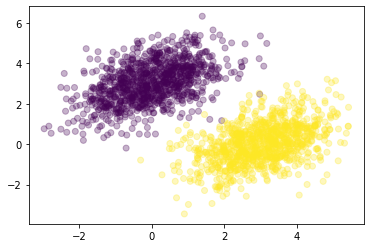

In [71]:
# plotting the two point class
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0], alpha=0.3)
plt.show()

In [76]:
# linear classifier variables
i_layers = 2
o_layer = 1

W = tf.Variable(initial_value=tf.random.uniform(
                                                shape=(i_layers, o_layer), 
                                                dtype='float32', 
                                                minval=0, maxval=1e-2))
b = tf.Variable(initial_value=tf.zeros((o_layer)))

In [81]:
# foward pass
def model(inputs):
    return tf.matmul(inputs, W) + b

In [78]:
# loss function (mean squared error)
def square_loss(targets, predictions):
    loss = tf.square(targets - predictions)
    return tf.reduce_mean(loss)

In [85]:
# training step function
lr = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    
    grad_loss_W, grad_loss_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_W * lr) # update weight -= dw * learning rate
    b.assign_sub(grad_loss_b * lr) # updata bias -= db * learning rate 
    return loss

In [87]:
# the batch training loop
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.0256
Loss at step 1: 0.0256
Loss at step 2: 0.0256
Loss at step 3: 0.0256
Loss at step 4: 0.0256
Loss at step 5: 0.0256
Loss at step 6: 0.0256
Loss at step 7: 0.0256
Loss at step 8: 0.0256
Loss at step 9: 0.0255
Loss at step 10: 0.0255
Loss at step 11: 0.0255
Loss at step 12: 0.0255
Loss at step 13: 0.0255
Loss at step 14: 0.0255
Loss at step 15: 0.0255
Loss at step 16: 0.0255
Loss at step 17: 0.0255
Loss at step 18: 0.0255
Loss at step 19: 0.0255
Loss at step 20: 0.0255
Loss at step 21: 0.0255
Loss at step 22: 0.0255
Loss at step 23: 0.0255
Loss at step 24: 0.0255
Loss at step 25: 0.0255
Loss at step 26: 0.0255
Loss at step 27: 0.0255
Loss at step 28: 0.0255
Loss at step 29: 0.0255
Loss at step 30: 0.0255
Loss at step 31: 0.0255
Loss at step 32: 0.0255
Loss at step 33: 0.0255
Loss at step 34: 0.0255
Loss at step 35: 0.0255
Loss at step 36: 0.0255
Loss at step 37: 0.0255
Loss at step 38: 0.0255
Loss at step 39: 0.0255


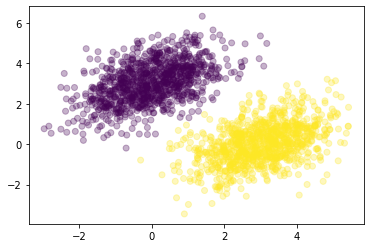

In [90]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5, alpha=0.3)
plt.show()

## Anotomy of a NN

### Layers: The building blocks of deep learning
- `rank-2` tensor `(sample, features)` processed by `Dense` layer
- `rank-3` tensor `(sample, timpsteps, features)` processed by `Recurrent` layer or 1D convolution layers `Conv1D`
- `rank-4` tensor `(Image data)` processed by 2D convolution layers `Conv2D`

In [91]:
# import libraries
from tensorflow import keras

In [101]:
# a dense layer implemented as a layer subclass
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
     
    # initialize weights and biases
    def build(self, input_shape):
        input_dim = input_shape[-1]
        # weights
        # add_weight() a method for creating weights
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        # biases
        self.b = self.add_weight(shape=(self.units,),
                                initializer='zeros')
        
    # forward pass 
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [103]:
# build model
dense = SimpleDense(32, tf.nn.relu)
X = tf.ones((2, 784))
z = dense(X)

print(z)

tf.Tensor(
[[0.         0.1264022  0.94094837 0.         0.81034696 0.
  0.         0.         1.2065539  1.8163666  0.         0.
  1.8103483  0.         0.         0.         0.         0.
  1.1139688  0.         0.         0.         0.         0.
  0.         0.         1.4672942  2.6489854  0.23338112 2.8165007
  0.04675126 0.46091318]
 [0.         0.1264022  0.94094837 0.         0.81034696 0.
  0.         0.         1.2065539  1.8163666  0.         0.
  1.8103483  0.         0.         0.         0.         0.
  1.1139688  0.         0.         0.         0.         0.
  0.         0.         1.4672942  2.6489854  0.23338112 2.8165007
  0.04675126 0.46091318]], shape=(2, 32), dtype=float32)
